<a href="https://colab.research.google.com/github/bmisson/isapml/blob/main/00_Condicionantes_ambientais_para_categorizacao_de_incendios_florestais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Condicionantes socioambientais para as piroregiões de Portugal continental

A Pirogeografia é o estudo da distribuição espaço temporal do fogo sobre a influência do clima, da vegetação e das atividades humanas. Nasce como a ideia de uma disciplina que permita um enquadramento intelectual para compreender a complexidade dos incêndios na Terra, incluindo as inter-relações entre a sociedade e o ambiente. Visa combinar e sintetizar disciplinas das ciências biológicas, físicas e sociais, para fornecer novas perspectivas sobre a gestão dos incêndios em um mundo dinâmico, incluindo a importância da gestão do fogo na conservação biológica e o ciclo global do carbono, e o nexo entre os incêndios, a saúde humana e os meios de subsistência (Bowman et al., 2013).

Pode ser entendida como um campo intelectual para as reflexões sobre os incêndios em um contexto global, que envolva estudiosos de diversas disciplinas. Esta sinergia de perspectivas é importante para auxiliar na compreensão dos múltiplos desafios associados a:

1.  Aumento da vulnerabilidade dos aglomerados humanos causados por duas tendências migratórias, a expansão urbana para áreas de vegetação propensas a arder (áreas de interface urbano rural) e o êxodo rural que deixa abandonados as pastagens e cultivos que acumulam material combustível.
2.   Aumento das condições meteorológicas que propiciam incêndios severos associados com as alterações climáticas globais.​
3. Diretrizes de qualidade do ar mais rigorosas para regular o fumo de incêndios florestais.
4. Preocupações com o impacto dos incêndios no balanço global de carbono.
5. Aumento da tensão entre os objetivos de conservação da biodiversidade e de gestão de incêndios

A comparação espacial e temporal entre e dentro de regiões, é uma abordagem com elevado potencial para compreender quais os fatores determinantes e condicionantes para os padrões dos incêndios. (Morgan et al.,  2001).

Uma forma de representar estas interações espaço-temporais em diferentes escalas é utilizar estatísticas obtidas a partir do histórico de incêndios florestais para agrupar diferentes regiões com base em suas características píricas comuns, ou seja, em piroregiões, delimitadas no tempo e  no espaço. (Ellia et al., 2022, Fréjaville & Curt, 2015).

Identificar as piroregiões fornece uma série de diretrizes para os tomadores de decisão sugerindo quais as estratégias podem ser mais eficazes para combinar a redução do risco de incêndios florestais com a proteção aos recursos florestais.

A distribuição espacial e temporal dos incêndios florestais em Portugal continental pode ajudar a identificar características (des)semelhantes entre regiões. Utilizamos métricas específicas de incêndios, a partir de dados históricos de incêndios entre 2000 e 2021, para identificar grupos de municípios com base em suas similaridades em relação aos incêndios, nomeadamente: (a) percentual acumulado da área ardida total, (b) percentual acumulado da área ardida nos meses de verão, (c) número médio anual de incêndios e (d) índice de GINI aplicado à área ardida ao longo do tempo.

Nossa abordagem procura identificar grupos de municípios (piroregiões) de Portugal continental (n=277, o Concelho de São João da Madeira foi removido da análise por não registrar nenhum incêndio no período analisado), com base em quatro algoritmos: k-means, k-medoids, ward.D2 e Affinity Propagation, utilizando ferramentas de Sistema de Informação Geográfica (ArcGIS Pro) e pacotes específicos no software R.




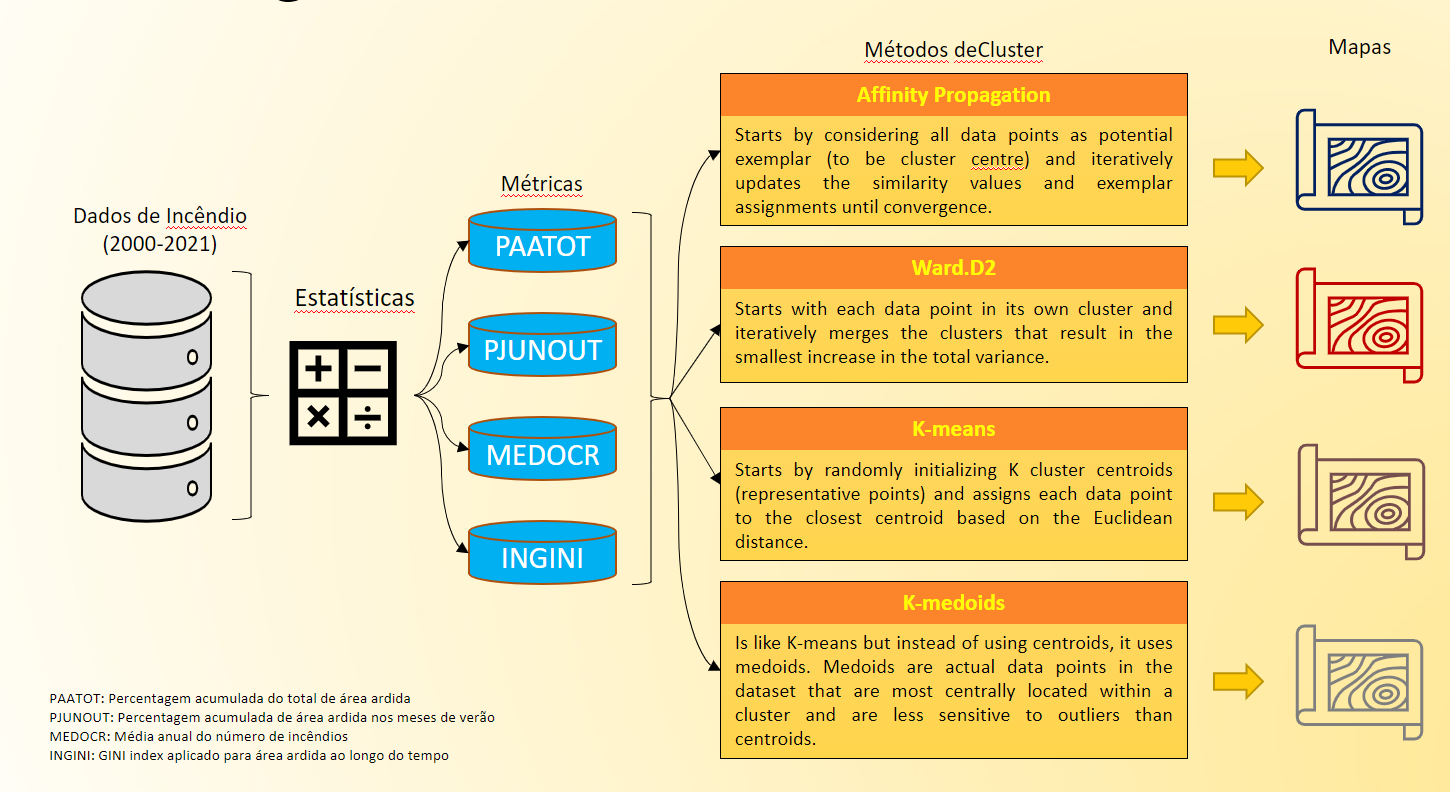

Essa etapa dividiu o país em 4 clusters  e apesar dos diferentes métodos, 77% dos municípios sempre foram agrupados da mesma forma.

Em seguida, unimos os resultados dos 4 métodos, com base na maioria de classificação, para obter uma classificação comum para as piroregiões. Os clusters resultantes são apresentados abaixo:

1. A (vermelho) localizado no centro de Portugal, apresenta a mais alta percentagem de área ardida acumulada ao longo dos anos, mas com baixa média de número de ocorrência de incêndios.
2. B (laranja)concentrado nos municípios do norte, é caracterizado pela maior média no número de ocorrência de incêndios distribuídos ao longo dos anos (baixo GINI index).
3. C (azul) disperso por todo Portugal, é caracterizado por apresentar a segunda maior media no número de ocorrência de incêndios, entretanto estes ocorrem principalmente fora do verão.
4. D (amarelo) Localizados na costa oeste e no sul e centro de Portugal, apresentam los menores valores para todas as métricas, exceto o GINI index, isto indica incêndios concentrados em poucos anos.

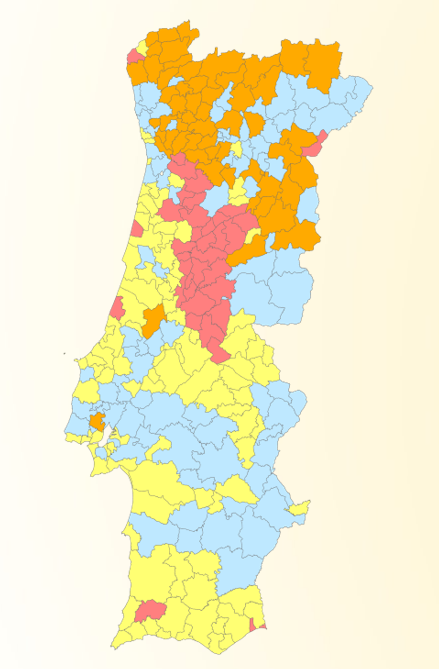

Essa abordagem permite identificar padrões e semelhanças entre as regiões em relação aos incêndios florestais. A classificação obtida pode ser útil para o planejamento de ações de prevenção e combate a incêndios, bem como para a implementação de medidas específicas em áreas com características semelhantes de risco de incêndio.

Este trabalho propõe analisar as condicionantes socioambientais que podem ter mais relevância para os padrões encontrados nos clusters encontrados. As varáveis utilizadas foram produzidos utilizando o ArcGis Pro e foram obtidas a partir de bases oficiais, são elas:

'DENSID', # Densidade da populacao hab/ha (Censo 2021)​

'IDPTOT', # Indice de dependencia total da populacao (Censo 2021)​

'PERAGR', # percentagem de Agricultura, SAF e Pastagens (COS18)​

'PERFLO', # percentagem de Floresta (COS2018)​

'PERMTV', # percentagem de Matos e Vegetacao Herbacea (COS2018)​

'TVAGRI', # taxa de variacao de agricultura (COS95 a COS18)​

'TVARTF', # taxa de variacao de artificial (COS95 a COS18)​

'TVFLMT', # taxa de variacao de floresta e matos (COS95 a COS18)​

'SLOP75', # quantile 75 de Slope​

'PRT2T1', # relação entre percentagem de área edificada (AE) tipo 2 sobre AE tipo 1​ (DGT 2018)

'PRAETT', # Percentagem de AE no municipio​ (DGT 2018)

'MTMOUT', # Média da temperatura máxima entre Outubro e Maio (CHELSA)​

'MTMJUN', # Média da temperatura máxima entre junho e Setembro (CHELSA)​

"MPROUT", # Média da precipitacao entre Outubro e Maio (CHELSA)​

"MPRJUN" # Média da precipitacao entre junho e setembro (CHELSA)

##Modulos utilizados

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importação dos dados

In [12]:
data = pd.read_pickle("/content/drive/MyDrive/Trabalho/TrabalhoPML.pkl")

In [13]:
data.columns

Index(['PAATOT', 'MEDOCR', 'PJUNOUT', 'INGINI', 'DENSID', 'IDPTOT', 'PERAGR',
       'PERFLO', 'PERMTV', 'TVAGRI', 'TVARTF', 'TVFLMT', 'SLOP75', 'PRT2T1',
       'PRAETT', 'MTMOUT', 'MTMJUN', 'MPROUT', 'MPRJUN', 'PAATOT_z',
       'MEDOCR_z', 'PJUNOUT_z', 'INGINI_z', 'APClust', 'NomeAp', 'NomeKme',
       'NomeKdd', 'NomeWd', 'Final'],
      dtype='object')

In [14]:
# colunas utilizadas:
colunas = [
       'DENSID', 'IDPTOT', 'PERAGR', 'PERFLO', 'PERMTV', 'TVAGRI', 'TVARTF',
       'TVFLMT', 'SLOP75', 'PRT2T1', 'PRAETT', 'MTMOUT', 'MTMJUN', 'MPROUT',
       'MPRJUN', 'Final']

df = data[colunas].copy() # variáveis socio ambientais
t = data[['PAATOT', 'MEDOCR', 'PJUNOUT', 'INGINI', 'Final']].copy() # métricas de incendio utilizadas para gerar os clusters

In [15]:
pd.set_option('display.max_columns', None) # apresentar todas as colunas

In [ ]:
df.head(3)

,DENSID,IDPTOT,PERAGR,PERFLO,PERMTV,TVAGRI,TVARTF,TVFLMT,SLOP75,PRT2T1,PRAETT,MTMOUT,MTMJUN,MPROUT,MPRJUN,Final
0,1.375560,60.67,15.166321,73.128009,1.088501,-15.81067,37.07909,0.35845,13.219937,0.179648,9.920299,16.288315,25.044364,132.595887,36.225427,A
1,1.563986,55.42,24.166731,62.921143,1.253831,-10.20119,31.16366,-0.05508,8.605840,0.298240,10.284551,16.275760,24.467230,141.438626,37.420608,D
2,1.270895,67.28,28.928072,60.137562,1.119373,-13.41106,27.14888,4.21845,7.297697,0.231733,9.925765,16.542296,25.194435,120.856312,34.348837,D


In [16]:
df.describe()

,DENSID,IDPTOT,PERAGR,PERFLO,PERMTV,TVAGRI,TVARTF,TVFLMT,SLOP75,PRT2T1,PRAETT,MTMOUT,MTMJUN,MPROUT,MPRJUN
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,2.960936,67.952780,35.073963,38.646603,13.449344,-9.981675,41.025421,2.435683,9.315927,0.377646,9.043399,16.027630,25.658798,105.587822,26.419238
std,8.269218,14.314701,20.940898,19.700283,11.724161,8.439816,23.764799,11.991229,5.298000,0.322996,11.447482,1.537257,2.178122,32.006431,12.702504
min,0.043851,41.480000,1.535270,0.950694,0.208823,-55.519870,6.774180,-39.728910,1.066190,0.001831,0.055063,11.306417,20.881165,63.227177,7.132479
25%,0.229150,57.910000,20.130224,23.719951,2.871823,-14.696620,25.806000,-1.639280,4.894611,0.190247,1.805334,14.922971,24.048393,78.988095,15.256944
50%,0.643367,65.840000,30.361077,37.296827,9.793634,-8.704430,35.879080,0.435440,8.430644,0.286496,5.557883,16.275760,25.363350,96.467380,25.931098
75%,1.617120,74.930000,46.223240,51.579497,21.270012,-5.088560,49.208880,4.776970,13.009160,0.467170,10.410795,17.326490,27.045713,131.125385,34.661626
max,72.085768,119.880000,93.859610,86.211526,46.103033,12.332680,216.940870,89.202570,23.718416,2.330779,76.607702,18.547161,30.824742,193.146585,62.737758


In [25]:
df.sort_values('Final', inplace = True, ignore_index=True)

In [26]:
df.Final.value_counts()

D    109
C     78
B     53
A     37
Name: Final, dtype: int64

In [27]:
response = 'Final'
# Create features and target variables
def X_Y(dados, response):
  X = pd.get_dummies(dados.drop(columns=['Final']))
  y = dados[response]
  classes = y.unique()
  return X, y, classes

X, y, classes = X_Y(df, response)
Xt, yt, classest = X_Y(t, response)

In [28]:
classes

array(['A', 'B', 'C', 'D'], dtype=object)

In [ ]:
X.head(3)

,DENSID,IDPTOT,PERAGR,PERFLO,PERMTV,TVAGRI,TVARTF,TVFLMT,SLOP75,PRT2T1,PRAETT,MTMOUT,MTMJUN,MPROUT,MPRJUN
0,1.375560,60.67,15.166321,73.128009,1.088501,-15.81067,37.07909,0.35845,13.219937,0.179648,9.920299,16.288315,25.044364,132.595887,36.225427
1,0.181260,87.13,16.092231,65.580226,15.291677,-17.16788,36.01927,4.07165,12.610747,0.447206,2.086395,16.244712,27.656205,97.197917,19.204710
2,0.330601,71.91,12.923455,74.378175,7.566712,-6.24664,37.69398,-0.08195,13.205514,0.744969,4.376548,15.839168,26.511817,111.454281,25.580788


In [ ]:
y

0      A
1      A
2      A
3      A
4      A
      ..
272    D
273    D
274    D
275    D
276    D
Name: Final, Length: 277, dtype: object

##Linear Discriminat Analysis

Foi feita uma Linear Discriminant Analysis para verificar a combinação linear das características (variáveis independentes) que melhor separe as classes dos dados.

O objetivo do LDA é maximizar a separação entre as classes, enquanto minimiza a variação dentro de cada classe. Ele calcula as estatísticas descritivas de cada classe e usa essas informações para determinar a melhor projeção linear dos dados.

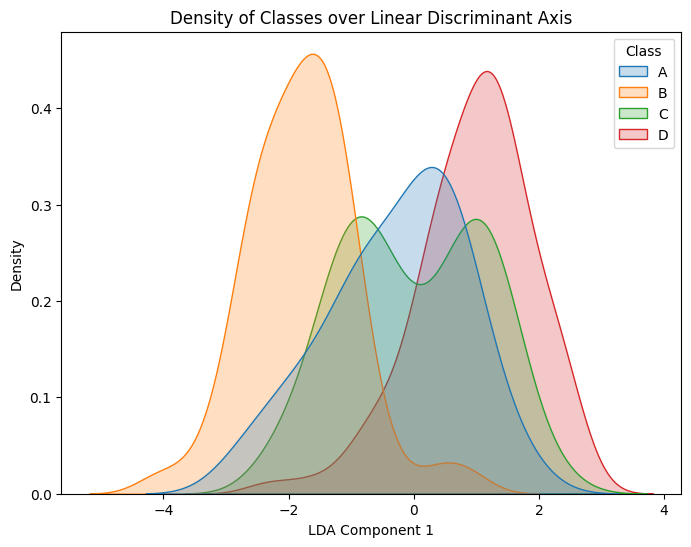

In [10]:
def LDAgraph(dados, response, X, y):
  if dados[response].nunique() > 2:
    # Represent classes in the 1st discriminant plane:
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_r = lda.fit(X, y).transform(X)
    # Combine the transformed data and target labels into a DataFrame
    data = {'LDA Component 1': X_r.squeeze(), 'Class': y}
    # df = pd.DataFrame(data) isto restransformava o df
    df_lda = pd.DataFrame(data)
    # Plot the result
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df_lda, x='LDA Component 1', hue='Class', fill=True, common_norm=False, color= 'colorblind') # data=df
    plt.xlabel('LDA Component 1')
    plt.title('Density of Classes over Linear Discriminant Axis')

    # Coletar os coeficientes para cada classe e variável
    ordem_classes = lda.classes_
    coeficientes = lda.coef_


    # Crie um dicionário com as informações
    data = {
        'Variável': X.columns,
        'Coeficiente A': coeficientes[0],
        'Coeficiente B': coeficientes[1],
        'Coeficiente C': coeficientes[2],
        'Coeficiente D': coeficientes[3],
            }

    # Crie o DataFrame com as informações
    df_info = pd.DataFrame(data)
    plt.show()
    return df_info

coeficientes = LDAgraph(df, response, X, y)

A partir do gráfico apresentado acima, é possível verificar uma clara diferença no comportamento das variáveis explicativas entre as classes B e D. Entretanto as classes A e C apresentam sobreposição entre si e também com as demais classes.
Os coeficientes indicam a contribuição de cada variável na separação das classes. O padrão apresentado no gráfico para as variáveis B e D, por exemplo, é corroborado pelos coeficientes que sáo, na maioria das vezes, com sinal oposto, ou seja indicam o comportamento inverso de determinada variável. Quanto maior o valor absoluto do coeficiente, mais importante a variável é para a discriminação.

In [11]:
coeficientes

,Variável,Coeficiente A,Coeficiente B,Coeficiente C,Coeficiente D
0,DENSID,0.011683,0.049872,0.008979,-0.034641
1,IDPTOT,0.040136,-0.059842,-0.017545,0.028029
2,PERAGR,-0.081929,0.021565,0.073886,-0.035548
3,PERFLO,0.009845,0.026292,0.037961,-0.043291
4,PERMTV,-0.066105,0.176974,0.023368,-0.080334
5,TVAGRI,-0.013941,0.026949,0.022663,-0.024589
6,TVARTF,-0.001899,0.000462,-0.000338,0.000662
7,TVFLMT,0.027268,0.018799,-0.020684,-0.003596
8,SLOP75,0.179966,-0.075520,-0.025638,-0.006023
9,PRT2T1,0.270812,0.411571,-0.078971,-0.235537


##Modelos ensemble

Os métodos de ensemble  são técnicas que combinam múltiplos modelos de aprendizado de máquina para obter previsões mais precisas e robustas. Em vez de depender de um único modelo, o ensemble usa a sabedoria coletiva de vários modelos para melhorar o desempenho geral.  Serão utilizados três classificadores para verificar qual deles apresenta o melhor modelo preditivo para os dados utilizados, nomeadamente AdaBoost (explorando alguns estimadores) e Random Forest.

####Funções utilizadas

In [45]:
def scores(model, Xtest, ytest,ypred, cv=5):
  accuracy = accuracy_score(ytest, ypred)
  print("Acurácia do modelo:", accuracy)
  print(cross_val_score(model, Xtest, ytest, cv=cv))

def plot_cm(ytest, ypred, classe):
  cm = confusion_matrix(ytest,ypred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classe)
  fig, ax = plt.subplots(figsize=(4, 4))
  cm_display.plot(ax=ax)

  # Personalização dos rótulos, título, etc.
  ax.set_title("Matriz de Confusão")
  ax.set_xlabel("Valor Previsto")
  ax.set_ylabel("Valor Real")

  # Exibição do gráfico
  plt.show()

def featureImportance(model, Xtrain):
  # utilizar o melhor modelo selecionado
  rfc = model
  # Importancia das feicoes
  importance_scores = rfc.feature_importances_
  # dados para plotar
  importance_std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
  # DataFrame com a importancia das features
  feature_importance_df = pd.DataFrame({'Feature': Xtrain.columns, 'Importance': importance_scores, 'Importance Std': importance_std})
  # Sort o df
  feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
  # Plot the feature importance and standard deviation
  plt.figure(figsize=(10, 6))
  plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], yerr=feature_importance_df['Importance Std'], capsize=3)
  plt.xlabel('Feature')
  plt.ylabel('Importance')
  plt.title('Feature Importance based on Mean Decrease in Impurity')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

def permutationImportance(model, Xtest, ytest):
  # extract permutation importance
  result = permutation_importance(model, Xtest, ytest,n_repeats=10)
  # sort by value
  sorted_importances_idx = result.importances_mean.argsort()
  # DataFrame
  importances = pd.DataFrame(
      result.importances[sorted_importances_idx].T,
      columns = Xtest.columns[sorted_importances_idx])
  ax = importances.plot.box(vert=False, whis=10)
  ax.set_title("Permutation Importances (test set)")
  ax.axvline(x=0, color="k", linestyle="--")
  ax.set_xlabel("Decrease in accuracy score")
  ax.figure.tight_layout()

###Divisão dos dados de teste e de treino

Para realizar o treinamento e os testes dos modelos foram selecionados 70% dos dados como treinamento e 30% dos dados para os testes de validação.

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

###AdaBoost

O princípio básico do AdaBoost é combinar vários classificadores fracos (weak learners) em um strong learner. Um classificador fraco é um modelo de aprendizado de máquina simples e com desempenho ligeiramente melhor do que o acaso. Por exemplo, um classificador fraco pode ser um classificador que é ligeiramente melhor do que uma chance aleatória, como uma árvore de decisão com pouca profundidade.

Para verificar o desempenho do AdaBoost serão testados dois classificadores diferentes, nomeadamente Decision Tree Classifier e Gradient Bossting Classifier. Também serão contabilizada a acurácia dos modelos e quais as principais componentes para cada um deles (Mean Decrease Impurity - MDI) e a permutação das variáveis (Permutation Importance - PI) após a criaçã do modelo.

O MDI baseia na estrutura interna do modelo e na redução da impureza durante o treinamento. O PI é um método mais agnóstico que avalia diretamente o impacto das variáveis nas métricas de avaliação, através da permutação dos valores das variáveis.

Em cada modelo primeiramente serão verificadas quais os parâmetros que geram o melhor desempenho do algoritmo, posteriormente estes parâmetros servirão como input do modelo final.


In [30]:
# Classificação com AdaBosst utilizando Decision Tree Classifier como estimador de base
base_DTC = DecisionTreeClassifier(max_depth = 5)
print('Variáveis analisadas: {0}'.format(X.columns))
adaboost = AdaBoostClassifier(estimator = base_DTC)
# Definição de alguns hyperparametros a testar
param_grid = {
    'n_estimators': [a for a in range(100,1100,100)],
    'learning_rate': [a for a in np.arange(0.1,1.0, 0.05)],
    'random_state': [a for a in range(10,101,5)]
    }
# testar os hyperparametros
random_search = RandomizedSearchCV(estimator = adaboost,
                                   param_distributions = param_grid,
                                   n_iter = 20, cv=5, random_state = 51)

# Ajuste do modelo
random_search.fit(X_train, y_train)
# Utilizar o melhor modelo com os melhores parametros
best_params = random_search.best_params_
print(best_params)

Variáveis analisadas: Index(['DENSID', 'IDPTOT', 'PERAGR', 'PERFLO', 'PERMTV', 'TVAGRI', 'TVARTF',
       'TVFLMT', 'SLOP75', 'PRT2T1', 'PRAETT', 'MTMOUT', 'MTMJUN', 'MPROUT',
       'MPRJUN'],
      dtype='object')
{'random_state': 35, 'n_estimators': 1000, 'learning_rate': 0.6000000000000002}


Utilizando o classificador Decision Tree Classifier os melhores parâmetros identificados foram: {'random_state': 35, 'n_estimators': 1000, 'learning_rate': 0.6000000000000002}


Acurácia do modelo: 0.7023809523809523
[0.52941176 0.64705882 0.52941176 0.58823529 0.75      ]


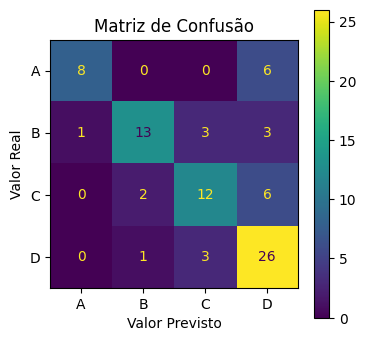

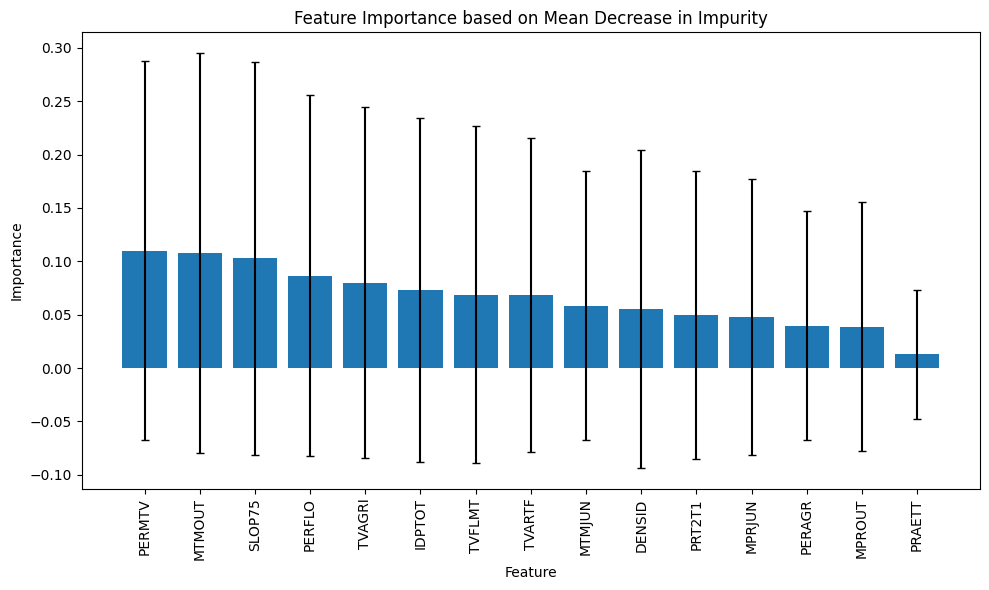

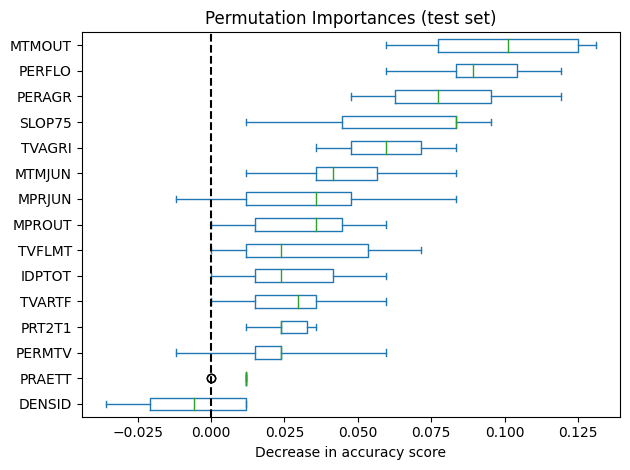

In [31]:
# Classificação com AdaBosst utilizando Decision Tree Classifier como estimador de base
base_DTC = DecisionTreeClassifier(max_depth = 5)
adaboost = AdaBoostClassifier(estimator = base_DTC, n_estimators= 1000, random_state= 35, learning_rate= 0.6000000000000002)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
# imprimir as estatísticas
scores(adaboost, X_test, y_test, y_pred)
# plotar a matriz de confusão
plot_cm(y_test, y_pred, classes)
# Acessar a importancia das feicões
featureImportance(adaboost, X_train)
# Permutation Inportance
permutationImportance(adaboost, X_test, y_test)


O modelo construído com os melhores parâmetros apresentou acurácia geral de aproximadamente 70%. As feições mais importantes foram a pertagem de matos e vegetação herbácea, a média da temperatura mácima entre outubro e maio a declividade do terreno e percentagem de área florestal. Entretanto ao acessar a permutation inportance das variáveis para o modelo a ordem das variáveis se alternou e as mais importantes foram a média da temperatura máxima entre outubro e maio, a percentagem de floresta, a percentagem de agricultura e a declividade

AdaBoost utilizando como estimador o Gradient Bossting Classifier

In [16]:
# Verificar os melhores parâmetros
base_GBC = GradientBoostingClassifier(max_depth=5)
print('Variáveis analisadas: {0}'.format(X.columns))
adaboost = AdaBoostClassifier(estimator = base_GBC)

# Definição de alguns hyperparametros a testar
param_grid = {
    'n_estimators': [a for a in range(100,1100,100)],
    'learning_rate': [a for a in np.arange(0.1,1.0, 0.05)],
    'random_state': [a for a in range(10,101,5)]
}

# testar os hyperparametros
random_search = RandomizedSearchCV(estimator = adaboost,
                                   param_distributions = param_grid,
                                   n_iter = 20, cv=5, random_state = 51)

# Ajuste do modelo
random_search.fit(X_train, y_train)
# Utilizar o melhor modelo com os melhores parametros
best_params = random_search.best_params_
print(best_params)

Variáveis analisadas: Index(['DENSID', 'IDPTOT', 'PERAGR', 'PERFLO', 'PERMTV', 'TVAGRI', 'TVARTF',
       'TVFLMT', 'SLOP75', 'PRT2T1', 'PRAETT', 'MTMOUT', 'MTMJUN', 'MPROUT',
       'MPRJUN'],
      dtype='object')
{'random_state': 25, 'n_estimators': 400, 'learning_rate': 0.9000000000000002}


Utilizando o classificador Decision Tree Classifier os melhores parâmetros identificados foram: {'random_state': 25, 'n_estimators': 400, 'learning_rate': 0.9000000000000002}

Acurácia do modelo: 0.6428571428571429
[0.41176471 0.47058824 0.58823529 0.47058824 0.75      ]


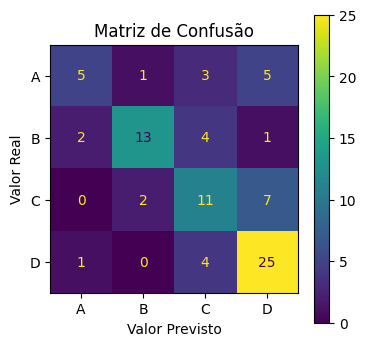

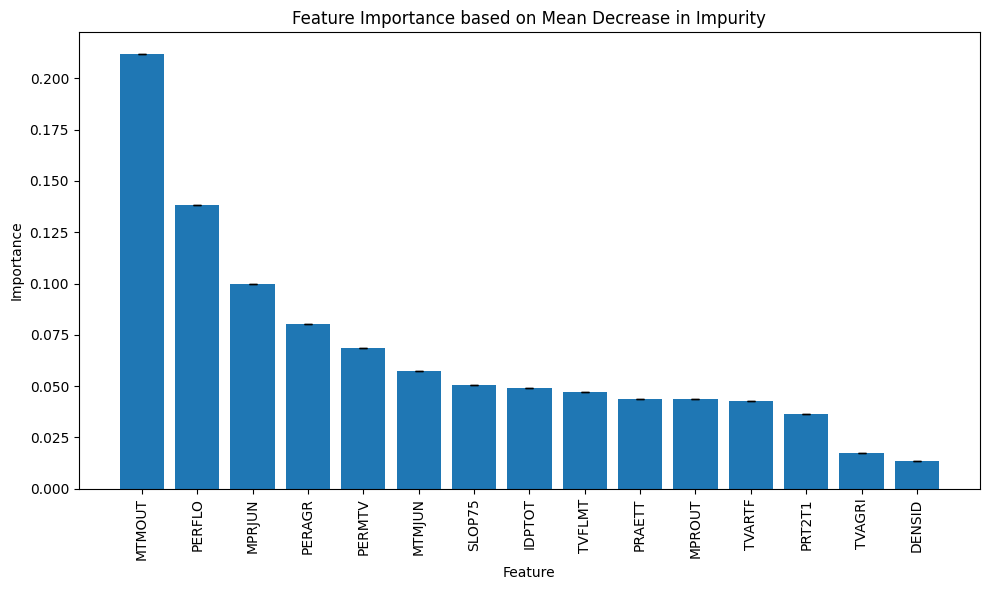

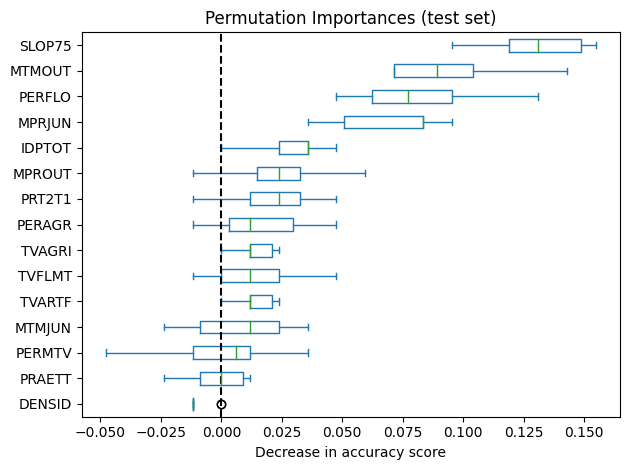

In [17]:
# Classificação com AdaBosst utilizando Gradient Bossting Classifier como estimador de base
base_GBC = GradientBoostingClassifier(max_depth=5)
adaboost = AdaBoostClassifier(estimator = base_GBC, n_estimators = 400, learning_rate = 0.9000000000000002, random_state = 25)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
# imprimir as estatísticas
scores(adaboost, X_test, y_test, y_pred)
# plotar a matriz de confusão
plot_cm(y_test, y_pred, classes)
# Acessar a importancia das feicões
featureImportance(adaboost, X_train)
# Permutation Inportance
permutationImportance(adaboost, X_test, y_test)

O modelo construído com os melhores parâmetros apresentou acurácia geral de aproximadamente 64%. As feições mais importantes foram  a média da temperatura máxima entre outubro e msio, a percentagem de área florestal, a média da precipitação nos meses de verão e a percentagem de agricultura. Ao acessar a permutation inportance das variáveis para o modelo a ordem das variáveis modificou para a declividade, a média da temperatura média entre outubro e maio, percentagem de florestas e média da precipitação nos meses de verão.

Entre os dois estimadores utilizados para iniciar o modelo AdaBoost, aquele que apresentou melhor perfomance foi o DecisionTreeClassifier. Entretanto os melhores parâmetros para cada um dos modelos apresentou diferenças acentuadas. A importância das variáveis também foi ligeiramente diferente entre os modelos, porém a percentagem de florestas e a média da temperatura máxima entre outubro e maio sempre estiveram presentes tanto na MDI quanto na PI para ambos os modelos.

###Random Forest


Random Forest é um algoritmo de aprendizado de máquina que utiliza um conjunto de árvores de decisão para realizar tarefas de classificação e regressão. Seu princípio básico é construir um ensemble (conjunto) de árvores de decisão, onde cada árvore é treinada em uma amostra aleatória dos dados de treinamento. Apresenta capacidade de lidar com conjuntos de dados grandes e de alta dimensionalidade, robustez a ruídos e outliers, além de ser menos suscetível a overfitting em comparação com uma única árvore de decisão.

In [18]:
# Definição de alguns hyperparametros a testar
param_grid = {
    'n_estimators': [a for a in range(100,1100,100)],
    'max_depth': [a for a in range(5,105,5)],
    'min_samples_split': [a for a in range(1,21,1)],
    'min_samples_leaf': [a for a in range(1,21,1)],
    'random_state': [a for a in range(10,101,5)]
    } # nao possui learning rate

# Classificador RF
rf_classifier = RandomForestClassifier()

# testar os hyperparametros
random_search = RandomizedSearchCV(estimator = rf_classifier,
                                   param_distributions = param_grid,
                                   n_iter = 20, cv=5, random_state=51)

# Ajuste do modelo
random_search.fit(X_train, y_train)
# Utilizar o melhor modelo com os melhores parametros
best_params = random_search.best_params_
print(best_params)
# reativar o melhor modelo
best_model = random_search.best_estimator_


{'random_state': 70, 'n_estimators': 700, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 95}


Algus parâmetros de inciação do Random Forest são diferentes do AdaBoost, portanto eles foram inseridos na seleção dos melhores parâmetros. O resultado foi: {'random_state': 70, 'n_estimators': 700, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 95}

Acurácia do modelo: 0.6666666666666666
[0.52941176 0.70588235 0.52941176 0.76470588 0.875     ]


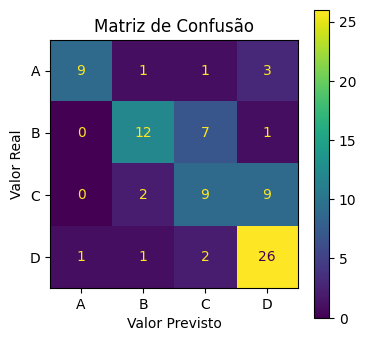

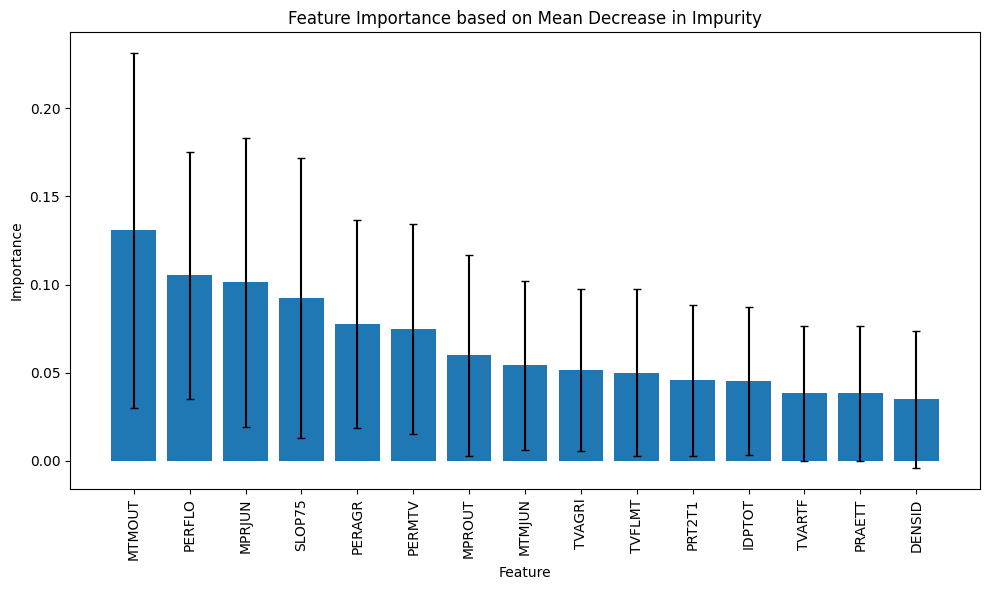

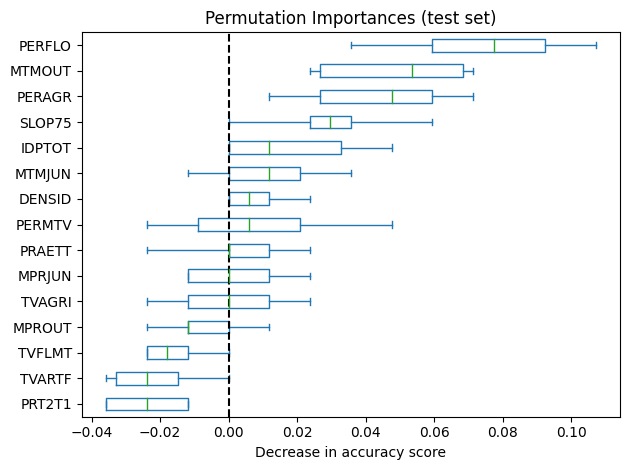

In [19]:
# Classificador RF
rf_classifier = RandomForestClassifier({'random_state': 70, 'n_estimators': 700, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 95})
# Predições com o melhor modelo
y_pred = best_model.predict(X_test)

# métricas e plotagem dos gráficos
# imprimir as estatísticas
scores(best_model, X_test, y_test, y_pred)
# plotar a matriz de confusão
plot_cm(y_test, y_pred, classes)
# Acessar a importancia das feicões
featureImportance(best_model, X_train)
# Permutation Inportance
permutationImportance(best_model, X_test, y_test)

Para o Random Forest o modelo utilizando os melhores parâmetros obteve a exatidão geral de aproximadamente 67%. As feições mais importantes foram a média da temperatura máxima entre outubro e msio, a percentagem de área florestal, a média da precipitação nos meses de verão e a declividade. Na Permutation inportance a média da precipitação nos meses de verão deixou de ser importante e deu lugar a percentagem de área agrícola.

###Melhoria dos modelos

Para tentar melhorar a capacidade preditiva do modelo será verificada a correlação entre as variáveis e serão padronizados os valores utilizando o z-score. Estes testes serão realizados utilizando apenas o AdaBoost com o Decision Trees e o Random Forest, que apresentaram melhor desempenho.

####Z-score

In [32]:
X2 = zscore(X)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=51)

In [33]:
X2.head(3)

,DENSID,IDPTOT,PERAGR,PERFLO,PERMTV,TVAGRI,TVARTF,TVFLMT,SLOP75,PRT2T1,PRAETT,MTMOUT,MTMJUN,MPROUT,MPRJUN
0,-0.192067,-0.509683,-0.952379,1.753468,-1.056213,-0.691904,-0.166358,-0.173543,0.738217,-0.614115,0.076741,0.169885,-0.282604,0.845360,0.773386
1,-0.336756,1.342112,-0.908084,1.369644,0.157424,-0.853006,-0.211035,0.136677,0.623024,0.215748,-0.608832,0.141470,0.918691,-0.262606,-0.568989
2,-0.318663,0.276945,-1.059678,1.817042,-0.502661,0.443350,-0.140438,-0.210336,0.735490,1.139297,-0.408413,-0.122818,0.392339,0.183622,-0.066126


In [34]:
# Classificação com AdaBosst utilizando Decision Tree Classifier como estimador de base
base_DTC = DecisionTreeClassifier(max_depth = 5)
print('Variáveis analisadas: {0}'.format(X.columns))
adaboost = AdaBoostClassifier(estimator = base_DTC)
# Definição de alguns hyperparametros a testar
param_grid = {
    'n_estimators': [a for a in range(100,1100,100)],
    'learning_rate': [a for a in np.arange(0.1,1.0, 0.05)],
    'random_state': [a for a in range(10,101,5)]
    }
# testar os hyperparametros
random_search = RandomizedSearchCV(estimator = adaboost,
                                   param_distributions = param_grid,
                                   n_iter = 20, cv=5, random_state = 51)

# Ajuste do modelo
random_search.fit(X_train, y_train)
# Utilizar o melhor modelo com os melhores parametros
best_params = random_search.best_params_
print(best_params)

Variáveis analisadas: Index(['DENSID', 'IDPTOT', 'PERAGR', 'PERFLO', 'PERMTV', 'TVAGRI', 'TVARTF',
       'TVFLMT', 'SLOP75', 'PRT2T1', 'PRAETT', 'MTMOUT', 'MTMJUN', 'MPROUT',
       'MPRJUN'],
      dtype='object')
{'random_state': 35, 'n_estimators': 1000, 'learning_rate': 0.6000000000000002}


Acurácia do modelo: 0.7023809523809523
[0.52941176 0.64705882 0.52941176 0.58823529 0.75      ]


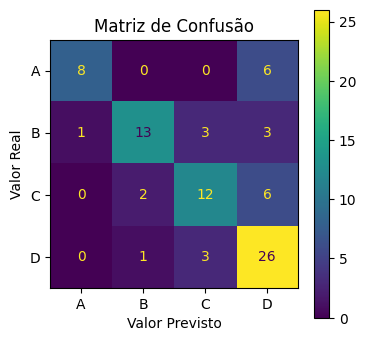

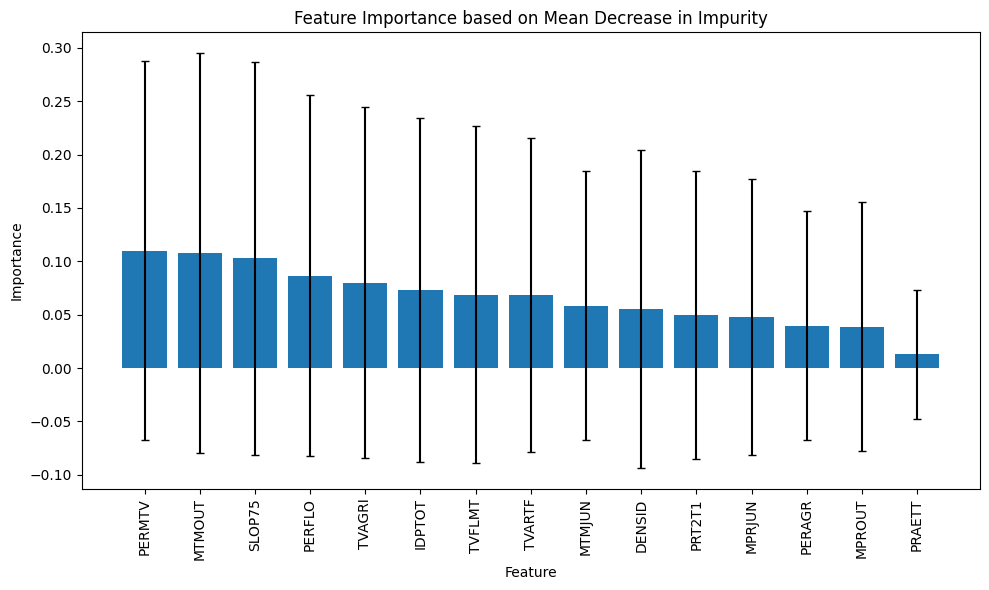

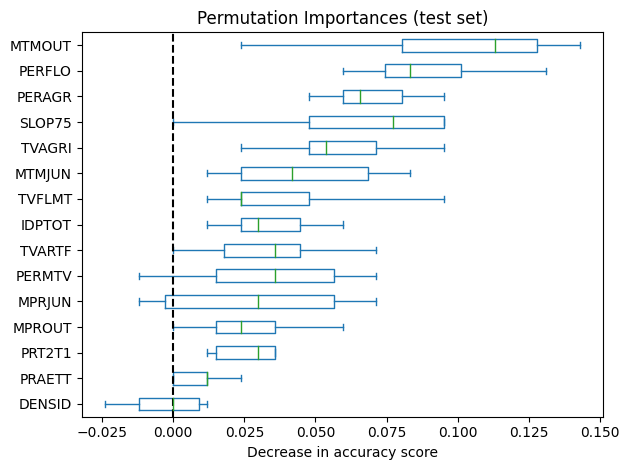

In [35]:
# Classificação com AdaBosst utilizando Decision Tree Classifier como estimador de base
base_DTC = DecisionTreeClassifier(max_depth = 5)
adaboost = AdaBoostClassifier(estimator = base_DTC, n_estimators= 1000, random_state= 35, learning_rate= 0.6000000000000002)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
# imprimir as estatísticas
scores(adaboost, X_test, y_test, y_pred)
# plotar a matriz de confusão
plot_cm(y_test, y_pred, classes)
# Acessar a importancia das feicões
featureImportance(adaboost, X_train)
# Permutation Inportance
permutationImportance(adaboost, X_test, y_test)


In [32]:
# Definição de alguns hyperparametros a testar
param_grid = {
    'n_estimators': [a for a in range(100,1100,100)],
    'max_depth': [a for a in range(5,105,5)],
    'min_samples_split': [a for a in range(1,21,1)],
    'min_samples_leaf': [a for a in range(1,21,1)],
    'random_state': [a for a in range(10,101,5)]
    } # nao possui learning rate

# Classificador RF
rf_classifier = RandomForestClassifier()

# testar os hyperparametros
random_search = RandomizedSearchCV(estimator = rf_classifier,
                                   param_distributions = param_grid,
                                   n_iter = 20, cv=5, random_state=51)

# Ajuste do modelo
random_search.fit(X_train, y_train)
# Utilizar o melhor modelo com os melhores parametros
best_params = random_search.best_params_
print(best_params)
# reativar o melhor modelo
best_model = random_search.best_estimator_

{'random_state': 70, 'n_estimators': 700, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 95}


Acurácia do modelo: 0.6666666666666666
[0.52941176 0.70588235 0.52941176 0.76470588 0.875     ]


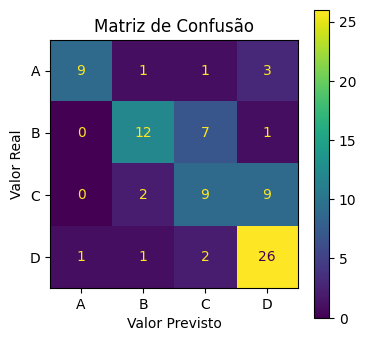

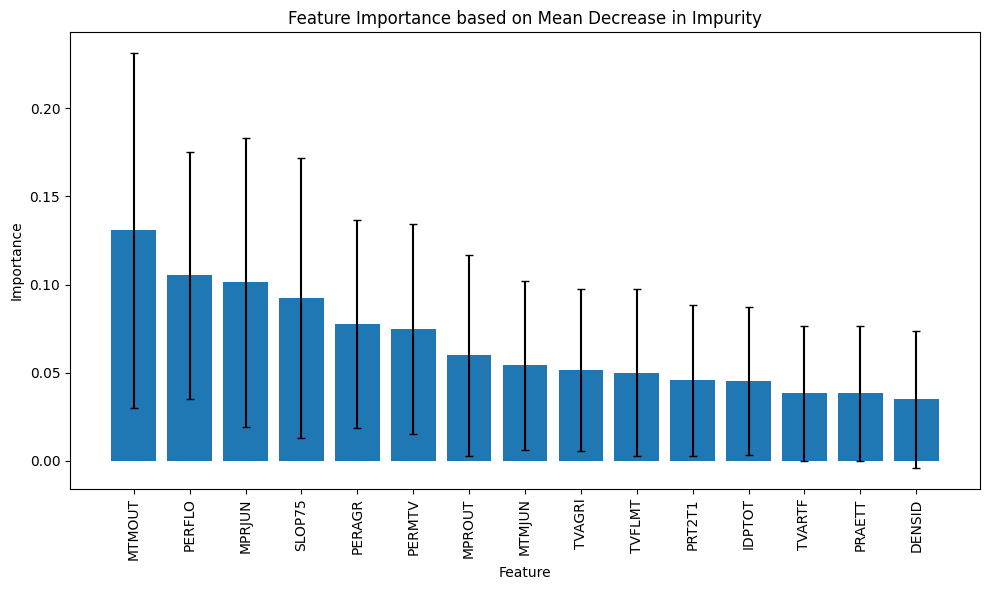

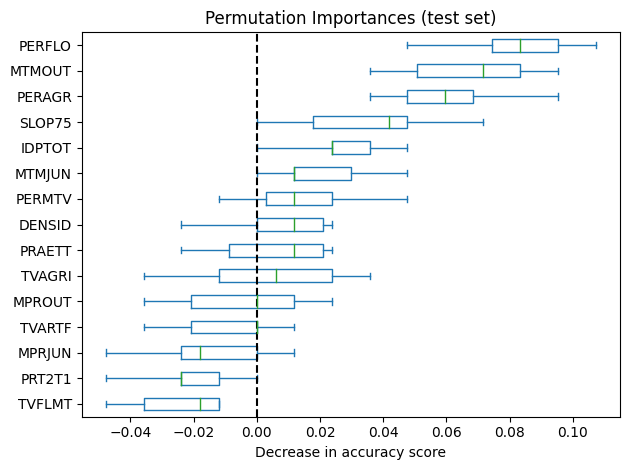

In [33]:
# Classificador RF
rf_classifier = RandomForestClassifier({'random_state': 70, 'n_estimators': 700, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 95})
# Predições com o melhor modelo
y_pred = best_model.predict(X_test)

# métricas e plotagem dos gráficos
# imprimir as estatísticas
scores(best_model, X_test, y_test, y_pred)
# plotar a matriz de confusão
plot_cm(y_test, y_pred, classes)
# Acessar a importancia das feicões
featureImportance(best_model, X_train)
# Permutation Inportance
permutationImportance(best_model, X_test, y_test)

A standarização dos valores utilizando o z-score não apresentou diferenças na exatidão dos modelos. Isto indica que os classificadores apresentam capacidade de trabalhar com as variáveis em diferentes unidades e com ranges diversos de valores, este é um fator positivo para este tipo de modelo, principalmente se estiver a trabalhar com um vasto banco de dados.

####Correlação

In [36]:
X2.corr().style.background_gradient(cmap='coolwarm')

,DENSID,IDPTOT,PERAGR,PERFLO,PERMTV,TVAGRI,TVARTF,TVFLMT,SLOP75,PRT2T1,PRAETT,MTMOUT,MTMJUN,MPROUT,MPRJUN
DENSID,1.000000,-0.272678,-0.257138,-0.284542,-0.086260,-0.564423,-0.193449,-0.312420,-0.143381,-0.294664,0.840257,0.070191,-0.276263,0.035592,-0.029760
IDPTOT,-0.272678,1.000000,-0.014036,0.155276,0.340089,0.167083,0.047342,0.115317,0.159318,0.160145,-0.495183,-0.174074,0.364070,-0.256194,-0.146923
PERAGR,-0.257138,-0.014036,1.000000,-0.655199,-0.321600,0.369395,0.303334,0.473503,-0.480472,0.471458,-0.316600,0.494264,0.633853,-0.543303,-0.451836
PERFLO,-0.284542,0.155276,-0.655199,1.000000,-0.113814,-0.085080,-0.123476,-0.146413,0.383978,-0.128925,-0.185407,-0.242416,-0.175857,0.394721,0.333021
PERMTV,-0.086260,0.340089,-0.321600,-0.113814,1.000000,0.166192,-0.083487,-0.119994,0.543825,-0.115023,-0.215542,-0.630560,-0.326950,0.084945,0.155581
TVAGRI,-0.564423,0.167083,0.369395,-0.085080,0.166192,1.000000,0.102460,0.014939,0.182809,0.255806,-0.507011,-0.137370,0.268383,-0.099009,0.047022
TVARTF,-0.193449,0.047342,0.303334,-0.123476,-0.083487,0.102460,1.000000,0.103734,-0.209641,0.298037,-0.276902,0.237679,0.306419,-0.318137,-0.305712
TVFLMT,-0.312420,0.115317,0.473503,-0.146413,-0.119994,0.014939,0.103734,1.000000,-0.216423,0.328454,-0.366167,0.259045,0.286898,-0.315226,-0.315721
SLOP75,-0.143381,0.159318,-0.480472,0.383978,0.543825,0.182809,-0.209641,-0.216423,1.000000,-0.128862,-0.146286,-0.708934,-0.354715,0.453615,0.494600
PRT2T1,-0.294664,0.160145,0.471458,-0.128925,-0.115023,0.255806,0.298037,0.328454,-0.128862,1.000000,-0.438821,0.319140,0.480254,-0.373217,-0.405836


As variáveis que apresentam maior correlação são: percentagem de área edificada total (PRAETT) com deinsidade da populaçãp (DENSID) e a as médias de precipitação entre os meses de verão e de inverno (MPROUT, MPRJUN), na tentativa de melhorar a capacidade dos modelos serão removidas as variáveis PRAETT e MPRJUN.

In [37]:
X3 = X2.drop(['PRAETT', 'MPRJUN'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=51)

In [42]:
X3.head(3)

,DENSID,IDPTOT,PERAGR,PERFLO,PERMTV,TVAGRI,TVARTF,TVFLMT,SLOP75,PRT2T1,MTMOUT,MTMJUN,MPROUT
0,-0.192067,-0.509683,-0.952379,1.753468,-1.056213,-0.691904,-0.166358,-0.173543,0.738217,-0.614115,0.169885,-0.282604,0.845360
1,-0.336756,1.342112,-0.908084,1.369644,0.157424,-0.853006,-0.211035,0.136677,0.623024,0.215748,0.141470,0.918691,-0.262606
2,-0.318663,0.276945,-1.059678,1.817042,-0.502661,0.443350,-0.140438,-0.210336,0.735490,1.139297,-0.122818,0.392339,0.183622


In [43]:
# Classificação com AdaBosst utilizando Decision Tree Classifier como estimador de base
base_DTC = DecisionTreeClassifier(max_depth = 5)
print('Variáveis analisadas: {0}'.format(X3.columns))
adaboost = AdaBoostClassifier(estimator = base_DTC)
# Definição de alguns hyperparametros a testar
param_grid = {
    'n_estimators': [a for a in range(100,1100,100)],
    'learning_rate': [a for a in np.arange(0.1,1.0, 0.05)],
    'random_state': [a for a in range(10,101,5)]
    }
# testar os hyperparametros
random_search = RandomizedSearchCV(estimator = adaboost,
                                   param_distributions = param_grid,
                                   n_iter = 20, cv=5, random_state = 51)

# Ajuste do modelo
random_search.fit(X_train, y_train)
# Utilizar o melhor modelo com os melhores parametros
best_params = random_search.best_params_
print(best_params)

Variáveis analisadas: Index(['DENSID', 'IDPTOT', 'PERAGR', 'PERFLO', 'PERMTV', 'TVAGRI', 'TVARTF',
       'TVFLMT', 'SLOP75', 'PRT2T1', 'MTMOUT', 'MTMJUN', 'MPROUT'],
      dtype='object')
{'random_state': 45, 'n_estimators': 400, 'learning_rate': 0.25000000000000006}


Acurácia do modelo: 0.6547619047619048
[0.41176471 0.52941176 0.58823529 0.64705882 0.6875    ]


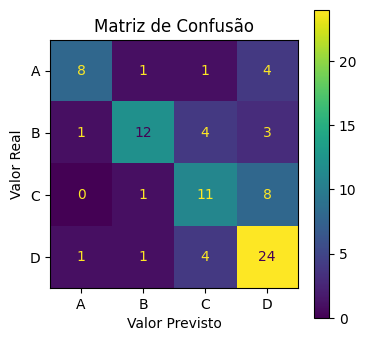

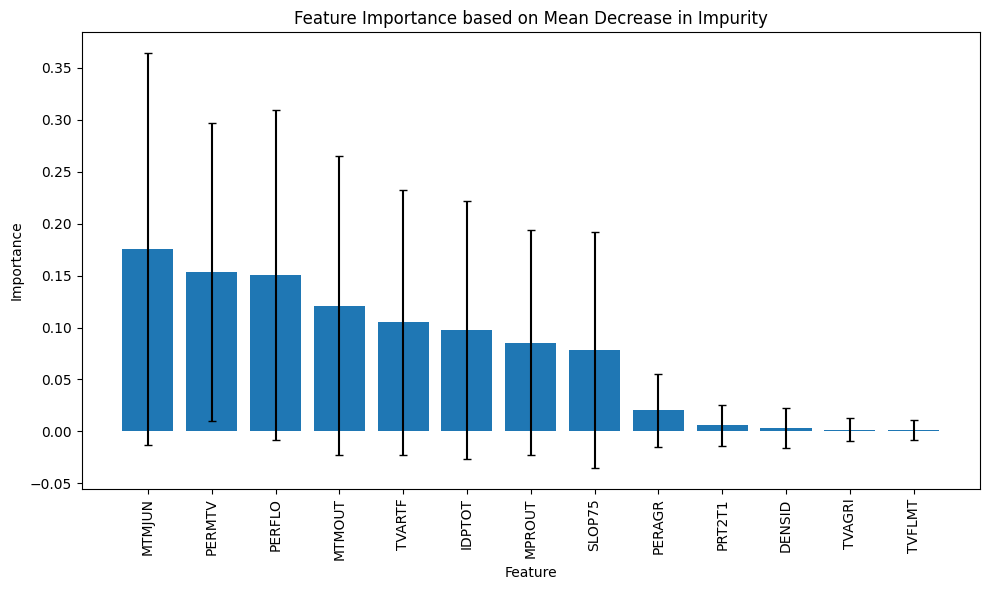

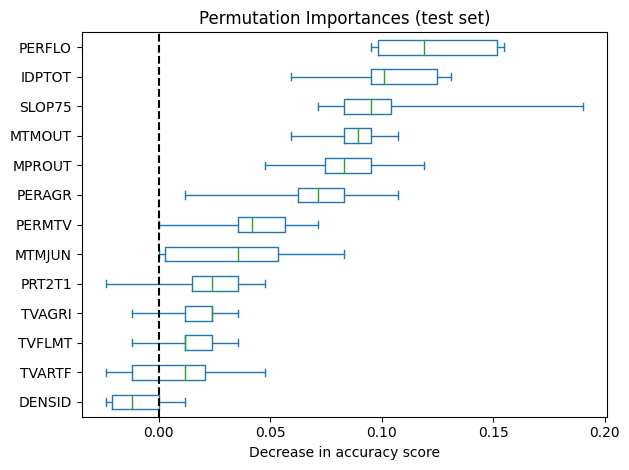

In [48]:
# Classificação com AdaBosst utilizando Decision Tree Classifier como estimador de base
base_DTC = DecisionTreeClassifier(max_depth = 5)
adaboost = AdaBoostClassifier(estimator = base_DTC, n_estimators= 400, random_state= 45, learning_rate=  0.25000000000000006)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
# imprimir as estatísticas
scores(adaboost, X_test, y_test, y_pred)
# plotar a matriz de confusão
plot_cm(y_test, y_pred, classes)
# Acessar a importancia das feicões
featureImportance(adaboost, X_train)
# Permutation Inportance
permutationImportance(adaboost, X_test, y_test)

In [47]:
# Definição de alguns hyperparametros a testar
param_grid = {
    'n_estimators': [a for a in range(100,1100,100)],
    'max_depth': [a for a in range(5,105,5)],
    'min_samples_split': [a for a in range(1,21,1)],
    'min_samples_leaf': [a for a in range(1,21,1)],
    'random_state': [a for a in range(10,101,5)]
    } # nao possui learning rate

# Classificador RF
rf_classifier = RandomForestClassifier()

# testar os hyperparametros
random_search = RandomizedSearchCV(estimator = rf_classifier,
                                   param_distributions = param_grid,
                                   n_iter = 20, cv=5, random_state=51)

# Ajuste do modelo
random_search.fit(X_train, y_train)
# Utilizar o melhor modelo com os melhores parametros
best_params = random_search.best_params_
print(best_params)
# reativar o melhor modelo
best_model = random_search.best_estimator_

{'random_state': 95, 'n_estimators': 600, 'min_samples_split': 11, 'min_samples_leaf': 12, 'max_depth': 25}


Acurácia do modelo: 0.6190476190476191
[0.47058824 0.47058824 0.52941176 0.47058824 0.625     ]


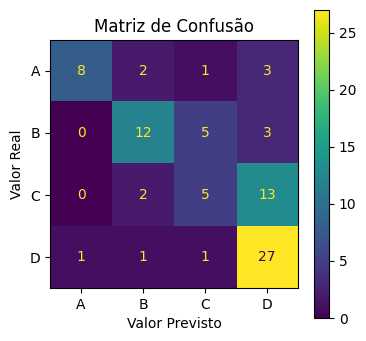

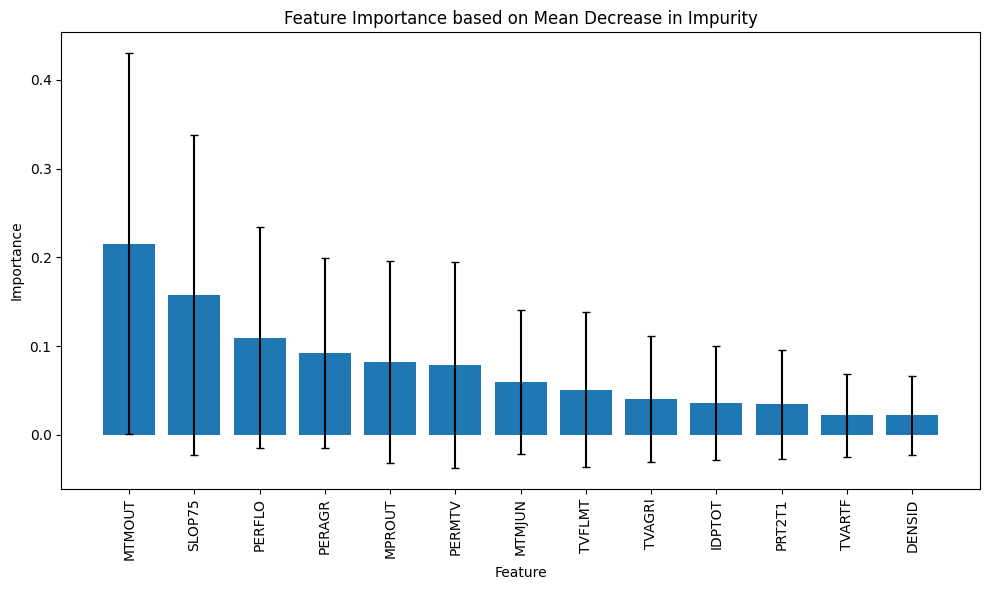

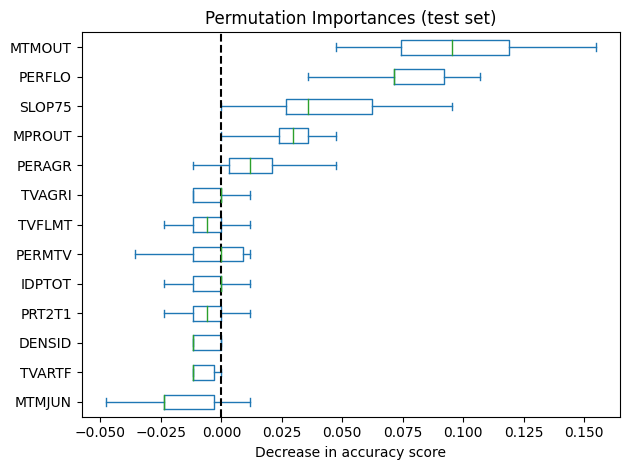

In [51]:
# Classificador RF
rf_classifier = RandomForestClassifier({'random_state': 95, 'n_estimators': 600, 'min_samples_split': 11, 'min_samples_leaf': 12, 'max_depth': 25})
# Predições com o melhor modelo
y_pred = best_model.predict(X_test)

# métricas e plotagem dos gráficos
# imprimir as estatísticas
scores(best_model, X_test, y_test, y_pred)
# plotar a matriz de confusão
plot_cm(y_test, y_pred, classes)
# Acessar a importancia das feicões
featureImportance(best_model, X_train)
# Permutation Inportance
permutationImportance(best_model, X_test, y_test)

A remoção das variáveis que tinham correlação maior do que o valor absoluto de 0.8 apresentou piora na exatidão geral do modelo. O desempenho do AdaBoost diminuiu de 70% para 65% e o do Random Forest diminuiu de 65% para 61%. Vale destacar que no modelo do AdaBoost a dependência total da população foi a segunda mais importante após a permutation importance, esta variável não tinha sido considerada importante por nenhum outro modelo testado.
O experimento demonstrou que estes modelos ensemble apresentam bom desempenho mesmo com as variáveis sem estandardização e com dados correlacionados.


##Considerações Finais

Este exercício procurou identificar as condicionantes socioambientais que mais contribuem para os clusters identidificados como piroregiões de Portugal continental.

Entre os tres algoritmos utilizados, aquele que apresentou o melhor desempenho foi o AdaBoost com o estimator Decision Tree Classifier. Este modelo obteve 70% de exatidão e indicou como principais variáveis para a classificação dos clusters a média da temperatura máxima nos meses entre outubro e maio e a percentagem de área florestal.

A exatidão geral dos modelos variou de 60% a 70% e após a estandarização e remoção das variáveis correlacionadas entre 60% e 65%, indicando que os modelos apresentam bom desempenho mesmo com os os dados 'puros'.

A relativa baixa acurácia dos modelos era esperada uma vez que os clusters foram criados a partir das métricas extraídas do histórico dos incêndios. Entretanto verificou-se que algumas das variáveis foram consideradas importantes em todos os modelos, por exemplo: a média da temperatura máxima entre outubro e maio e a percentagem de floresta.

Outro fator que pode ter influenciado na performance dos modelos é a diferença no número de amostras por clusters {A: 37, B: 53, C: 78, D: 109} e o pequeno número de elementos (277). Desta forma podem aparecer em um mesmo cluster, como por exemplo o D, municípios com padrões socio ambientais muito diversos por conta da diferenças geográficas existentes em Portugal. Além disso por conta da diferente forma como é gerido o território e as práticas prevenção de incêndios dois municípios com características socio amebientais semelhantes podem apresentar padrões diversos de ocorrência de incêndios.

Somente a título de ilustração para verificar como seria o desempenho do melhor modelo obtido caso os algoritmos fossem treinados utilizando as métricas de incêndio originais

In [52]:
X_train, X_test, y_train, y_test = train_test_split(Xt, yt, test_size=0.3, random_state=51)

In [54]:
# Classificação com AdaBosst utilizando Decision Tree Classifier como estimador de base
base_DTC = DecisionTreeClassifier(max_depth = 5)
print('Variáveis analisadas: {0}'.format(Xt.columns))
adaboost = AdaBoostClassifier(estimator = base_DTC)
# Definição de alguns hyperparametros a testar
param_grid = {
    'n_estimators': [a for a in range(100,1100,100)],
    'learning_rate': [a for a in np.arange(0.1,1.0, 0.05)],
    'random_state': [a for a in range(10,101,5)]
    }
# testar os hyperparametros
random_search = RandomizedSearchCV(estimator = adaboost,
                                   param_distributions = param_grid,
                                   n_iter = 20, cv=5, random_state = 51)

# Ajuste do modelo
random_search.fit(X_train, y_train)
# Utilizar o melhor modelo com os melhores parametros
best_params = random_search.best_params_
print(best_params)

Variáveis analisadas: Index(['PAATOT', 'MEDOCR', 'PJUNOUT', 'INGINI'], dtype='object')
{'random_state': 60, 'n_estimators': 600, 'learning_rate': 0.20000000000000004}


Acurácia do modelo: 0.8928571428571429
[0.88235294 0.76470588 0.76470588 0.82352941 0.875     ]


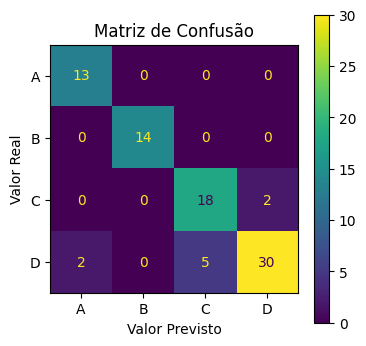

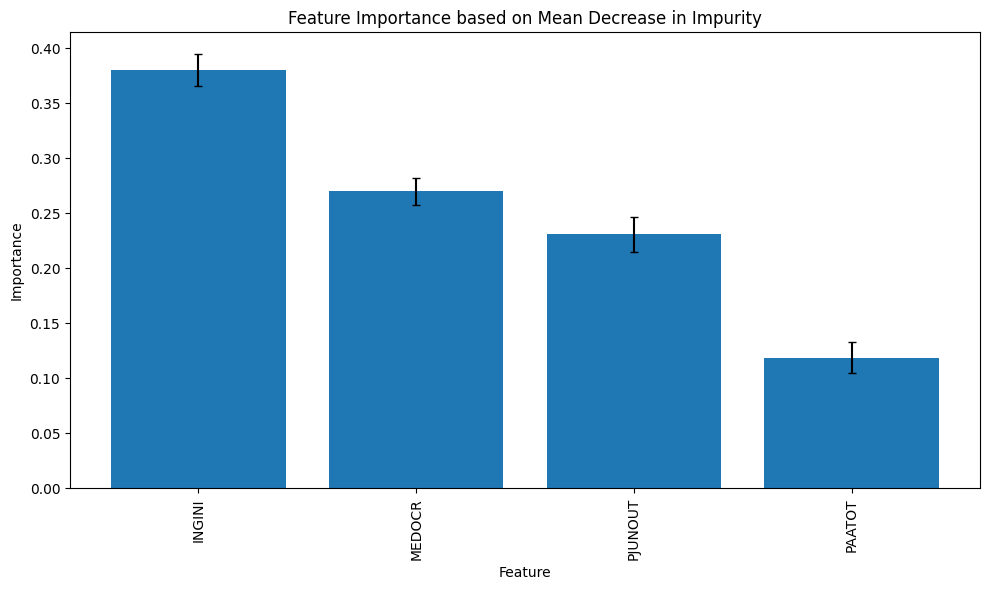

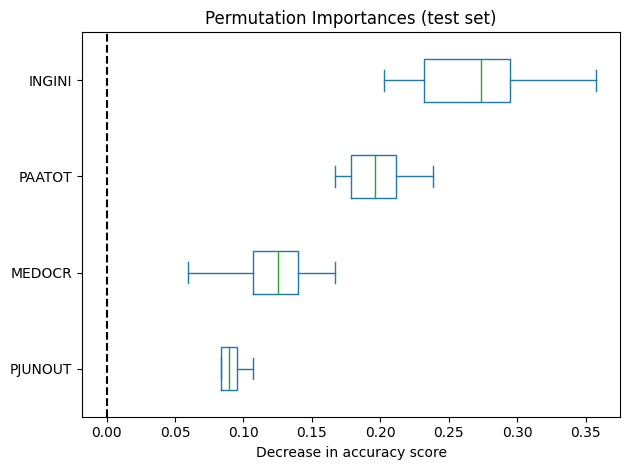

In [55]:
# Classificação com AdaBosst utilizando Decision Tree Classifier como estimador de base
base_DTC = DecisionTreeClassifier(max_depth = 5)
adaboost = AdaBoostClassifier(estimator = base_DTC, n_estimators= 600, random_state= 60, learning_rate= 0.2000000000000004)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
# imprimir as estatísticas
scores(adaboost, X_test, y_test, y_pred)
# plotar a matriz de confusão
plot_cm(y_test, y_pred, classes)
# Acessar a importancia das feicões
featureImportance(adaboost, X_train)
# Permutation Inportance
permutationImportance(adaboost, X_test, y_test)

Neste teste o AdaBoost apresentou exatidão de 89% e indicou o Indice Gini como a principal variável do modelo. Isto também pode estar relacionado com o número de amostras, uma vez que a principal característica do cluster D é o elevado índice gini, que indica que os incêndios ocorridos neste cluster são concentrados em poucos anos.

De um modo geral a utilização dos modelos de machine learning foi importante para verificar as condicionantes socio ambientais que se relacionam com os padrões de incêndios em Portugal. Como próximos passos deverão ser incluídas novas variáveis que possam auxiliar na caracterização dos clusters identificados. Como testes futuros podem ser inclusas também novas métricas dos incêndios que não foram utilizadas inicialmente.

##Referência

Bowman, D. M. J. S., O’Brien, J. A., & Goldammer, J. G. (2013). Pyrogeography and the global quest for sustainable fire management. Annual Review of Environment and Resources, 38, 57–80. https://doi.org/10.1146/annurev-environ-082212-134049

Elia, M., Giannico, V., Ascoli, D., Argañaraz, J. P., D’Este, M., Spano, G., Lafortezza, R., & Sanesi, G. (2022). Uncovering current pyroregions in Italy using wildfire metrics. Ecological Processes, 11(1). https://doi.org/10.1186/s13717-022-00360-6 ​

Fréjaville, T., & Curt, T. (2015). Spatiotemporal patterns of changes in fire regime and climate: defining the pyroclimates of south-eastern France (Mediterranean Basin). Climatic Change, 129(1–2), 239–251. https://doi.org/10.1007/s10584-015-1332-3 ​

Moreno, M. V., & Chuvieco, E. (2013). Characterising fire regimes in Spain from fire statistics. International Journal of Wildland Fire, 22(3), 296–305. https://doi.org/10.1071/WF12061 ​

Morgan, P., Hardy, C. C., Swetnam, T. W., Rollins, M. G., & Long, D. G. (2001). Mapping fire regimes across time and space: Understanding coarse and fine-scale fire patterns. International Journal of Wildland Fire, 10(4), 329–342. https://doi.org/10.1071/WF01032 ​

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning